### Load Modules

In [1]:
# Restart the kernel
import os
import dill as pickle
notebook_dir = os.getcwd()
current_dir ='../../../'
os.chdir(current_dir)

In [2]:
working_dir = os.getcwd()

In [3]:

# Basic and Utility Imports from Local Modules
from src.codes.basic import *
from src.codes.utils.fem_utils_HC import *
from src.codes.utils.plot_files.plot_utils import OneDPlot as plot
from src.codes.utils.rom_utils import *

# from src.codes.utils.plot_utils import data_stats

# # Problem Classes for Heat Conduction
from src.codes.prob_classes.heat_conduction.base_class_heat_conduction import ROM_simulation_UQ
# os.chdir(current_dir)

# # Reduced Order Modeling (ROM) Classes
import src.codes.reductor.rom_class_ms as rom_class

# Algorithms for ECSW Model Reduction
from src.codes.algorithms.ecsw import ecsw_red

# Third-Party Libraries for Data Handling and Visualization
import ptitprince as pt
import pandas as pd

# os.chdir(current_dir)

# Reload Specific Modules (Uncomment if needed)
# from importlib import reload
# reload(deim_module)

### Epistemic Uncertainty[Number of snapshots]

In [4]:
Model_error = []
Model_ROM_error = []

### Train-Test split

In [5]:
NLS_test = np.load(notebook_dir+'/data/NLS_test_new.npy')
param_list_test = np.load(notebook_dir+'/data/param_list_test_new.npy')

In [6]:
len(NLS_test)

20

##### Parameters

In [7]:
q_param = (-50, 50) # For F
k_param = (-0.5, 0.5) # For K
param_ranges = [k_param, q_param]
method = 'sobol'

In [8]:
p=0
# N_snap = 2

In [129]:
p+=1
N_snap=2**p
print(N_snap)

64


### Generate Training datasets using different distribution

In [130]:
import numpy as np
from tests.UQ.HC.FEM_1D_data_gen_UQ import UQ_data_gen

# from src.codes.prob_classes.structural_mechanics.base_class_struc_mech_NL_static_axial import ROM_simulation_UQ

# Step 2: Modify the parameter
# Specify mean and standard deviation

# generate = True
filename_dataC = f'data/DataClass_UQ_STATIC_NL_{N_snap}_{method}.dill'


if os.path.exists(notebook_dir+'/'+filename_dataC):

    generate = False

    with open(notebook_dir+'/'+filename_dataC, 'rb') as f:
        Data_cls = pickle.load(f)

else:
    generate = True
    params = generate_sobol(len(param_ranges), N_snap, param_ranges)
    print(params)


[[-3.79527550e-01  1.82985619e+01]
 [ 4.21425983e-01 -2.51195353e+01]
 [ 1.97501803e-01  2.80906463e+01]
 [-2.19808521e-01 -1.62095042e+01]
 [-8.60782890e-02  4.28942400e+01]
 [ 1.12352335e-01 -1.30820656e+00]
 [ 2.72201049e-01  1.95075506e+00]
 [-3.10132184e-01 -4.15649506e+01]
 [-3.65488158e-01  3.52210592e+01]
 [ 3.41224949e-01 -2.05994294e+01]
 [ 5.55331716e-02  1.99632646e+01]
 [-1.94898499e-02 -3.65437741e+01]
 [-1.66765952e-01  9.85941365e+00]
 [ 1.26877369e-01 -4.67453290e+01]
 [ 4.73005392e-01  4.37685849e+01]
 [-4.52587415e-01 -1.19542951e+01]
 [-4.80133848e-01  4.93415363e+01]
 [ 4.37990675e-01 -6.55219443e+00]
 [ 1.61342651e-01  9.13258214e+00]
 [-1.38792392e-01 -4.76430112e+01]
 [-5.38864667e-02  2.39371668e+01]
 [ 2.73688762e-02 -3.27408181e+01]
 [ 3.68840047e-01  3.29928339e+01]
 [-3.30664176e-01 -2.29986007e+01]
 [-2.74690340e-01  4.15365873e+00]
 [ 2.99198047e-01 -3.91423681e+01]
 [ 8.57824637e-02  3.88969266e+01]
 [-1.22069568e-01 -5.08584110e+00]
 [-1.93169985e-01  2

In [131]:
if(generate):
    tic = time.time()
    Data_cls = UQ_data_gen(params,filename_dataC)
    toc = time.time()
    fom_time = toc-tic

Snap 0
1 finished
Snap 1
1 finished
Snap 2
1 finished
Snap 3
1 finished
Snap 4
1 finished
Snap 5
1 finished
Snap 6
1 finished
Snap 7
1 finished
Snap 8
1 finished
Snap 9
1 finished
Snap 10
1 finished
Snap 11
1 finished
Snap 12
1 finished
Snap 13
1 finished
Snap 14
1 finished
Snap 15
1 finished
Snap 16
1 finished
Snap 17
1 finished
Snap 18
1 finished
Snap 19
1 finished
Snap 20
1 finished
Snap 21
1 finished
Snap 22
1 finished
Snap 23
1 finished
Snap 24
1 finished
Snap 25
1 finished
Snap 26
1 finished
Snap 27
1 finished
Snap 28
1 finished
Snap 29
1 finished
Snap 30
1 finished
Snap 31
1 finished
Snap 32
1 finished
Snap 33
1 finished
Snap 34
1 finished
Snap 35
1 finished
Snap 36
1 finished
Snap 37
1 finished
Snap 38
1 finished
Snap 39
1 finished
Snap 40
1 finished
Snap 41
1 finished
Snap 42
1 finished
Snap 43
1 finished
Snap 44
1 finished
Snap 45
1 finished
Snap 46
1 finished
Snap 47
1 finished
Snap 48
1 finished
Snap 49
1 finished
Snap 50
1 finished
Snap 51
1 finished
Snap 52
1 finished
Sna

In [132]:
# train_mask, test_mask = train_test_split(N_snap,train_percentage = 0.8)
# NLS = np.asarray(Data_cls.NL_solutions)
# NLS_test = NLS[test_mask][:,Data_cls.FOS.data.mask]
# NLS_test.shape
# os.chdir(notebook_dir)
# np.save('data/param_list_test.npy',params[test_mask])

In [133]:
# load required variables from data
FOS = Data_cls.FOS
d = FOS.data
mask = d.mask
# param_list = np.asarray(Data_cls.param_list)
NLS = np.asarray(Data_cls.NL_solutions)
K_mus = Data_cls.K_mus
q_mus = Data_cls.q_mus

NLS_train = NLS[:,d.mask]

In [134]:
os.getcwd()

'c:\\Users\\suparnob\\OneDrive - Texas A&M University\\Academic\\TAMU_MATERIALS\\POSTDOC\\HYPERREDUCTION\\SUPARNO\\HYPERREDUCTION__TAMIDS\\pyHyperRom\\tests\\UQ\\HC'

In [135]:
# filename_dataC = 'examples/heat_conduction/OneD_heat_conduction/data/DataClass_UQ_NL.dill'

# with open(filename_dataC, 'rb') as f:
#     Data_cls = pickle.load(f,ignore=True)

# # # # np.save(notebook_dir+'/data/test_mask.npy',test_mask)
# param_list = np.asarray(Data_cls.param_list)
# param_list_test = param_list[Data_cls.test_mask]

# NLS = np.asarray(Data_cls.NL_solutions)
# NLS_test = NLS[Data_cls.test_mask][:,Data_cls.FOS.data.mask]
# NLS_test.shape

# # os.chdir(notebook_dir)
# np.save(notebook_dir+'/data/param_list_test_new.npy',param_list_test)
# np.save(notebook_dir+'/data/NLS_test_new.npy',NLS_test)

# # np.save('data/param_list_test.npy',params[test_mask])

## ECSW Hyper-reduction

### Mean Subtraction

In [136]:
NLS_train_mean = np.mean(NLS_train,axis = 0)
NLS_train_ms = NLS_train - NLS_train_mean

### Plot snapshots

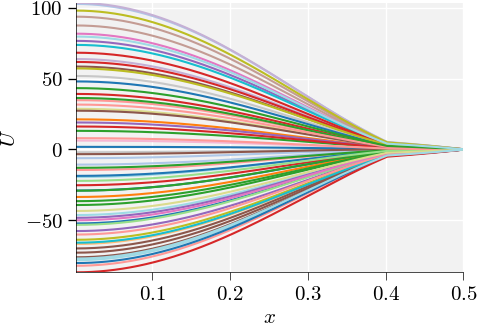

In [137]:
fig, ax = plt.subplots(figsize=(5,3.5))

for i in range(len(NLS_train_ms)):
    Plot = plot(d.xi[0][1:], NLS_train_ms[i], ax=ax)
    Plot.line_()
plt.ylabel('$U$')
plt.show()


#### Step 1: Perform SVD on the snapshots (calculate $\mathbb{V}(=\mathbb{W}$)):

Number of modes selected: 4


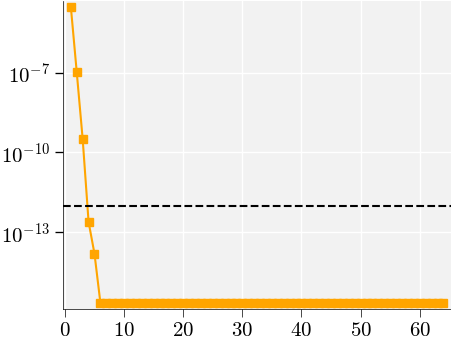

In [138]:
plt.rcParams['figure.dpi'] = 100
n_sel, U = svd_mode_selector(NLS_train_ms, tolerance=1e-12,modes=True)
n_sel +=0
V_sel = U[:, :n_sel]

In [139]:
V_sel.shape

(250, 4)

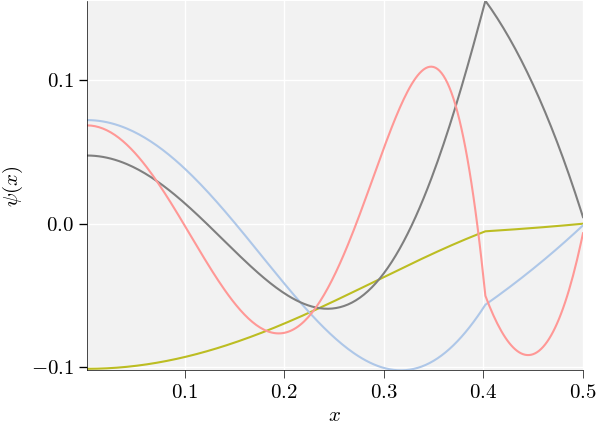

In [140]:
fig, ax = plt.subplots()

for i in range(n_sel):
    Plot = plot(d.xi[0][1:], V_sel[:,i], ax=ax)
    Plot.line_()

Plot.ax.set_xlabel('$x$')
Plot.ax.set_ylabel('$\psi(x)$')

plt.show()

### Step 2: Perform NNLS for ECSW

In [141]:
tic_h_setup_b = time.time()

tol=1e-6

data = {'K_mus':K_mus,'q_mus':q_mus}
xi, residual = ecsw_red(d, V_sel, d.Le, data, n_sel, len(NLS_train), NLS_train, NLS_train_mean, Data_cls.FOS.residual_func, tol=tol)

toc_h_setup_b = time.time()

norm of rhs: 169989.6102863087


c:\Users\suparnob\OneDrive - Texas A&M University\Academic\TAMU_MATERIALS\POSTDOC\HYPERREDUCTION\SUPARNO\HYPERREDUCTION__TAMIDS\pyHyperRom\src\codes\algorithms\nnls_scipy.py:135: LinAlgWarning: Ill-conditioned matrix (rcond=5.25047e-17): result may not be accurate.
  s[P] = solve(AtA[P_ind[:, None], P_ind[None, :]], Atb[P],


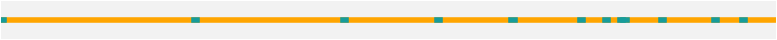

Fraction of total elements active in the ROM: 5.2%
residual=4.081003357810995e-09


In [142]:
plot(np.arange(d.ncells[0]), xi, ax="").element_()
print(f"Fraction of total elements active in the ROM: {len(xi[xi>0])*100/len(xi)}%")
print(f"{residual=}")


### ROM Simulation

In [143]:
Data_cls.mean = NLS_train_mean

In [144]:
eval_rom = True

In [145]:
if eval_rom:
    ROM = ROM_simulation_UQ(Data_cls, NLS_test, param_list_test, V_sel,fos_comp= True) #, N_rom_snap=1)
    ROM.run_simulation()

In [146]:
xi

array([32.6156611 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , 57.19284525,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [147]:
eval_rom = True

if eval_rom:
    ROM_h = ROM_simulation_UQ(Data_cls, NLS_test, param_list_test, V_sel, xi=xi, fos_comp= True) #, N_rom_snap=1)
    ROM_h.run_simulation_h_ecsw()

### Performance Statistics

In [148]:
NLS_rom_h = np.asarray(ROM_h.NL_solutions_rom)
# ROM_speed_up_h = ROM_h.speed_up
ROM_relative_error_h = ROM_h.rom_error
Model_error.append(ROM_relative_error_h)

In [149]:
NLS_rom = np.asarray(ROM.NL_solutions_rom)
# ROM_speed_up = ROM.speed_up
ROM_relative_error = ROM.rom_error
Model_ROM_error.append(ROM_relative_error)

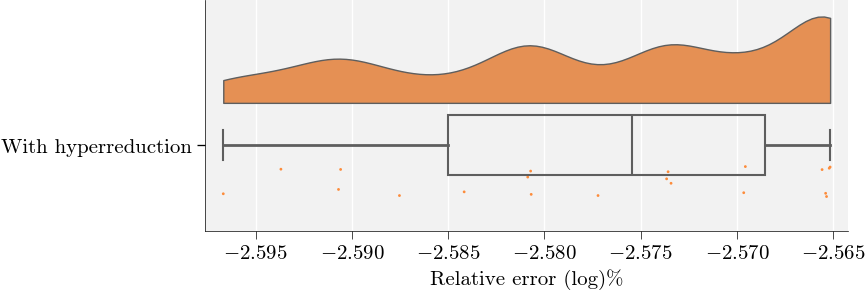

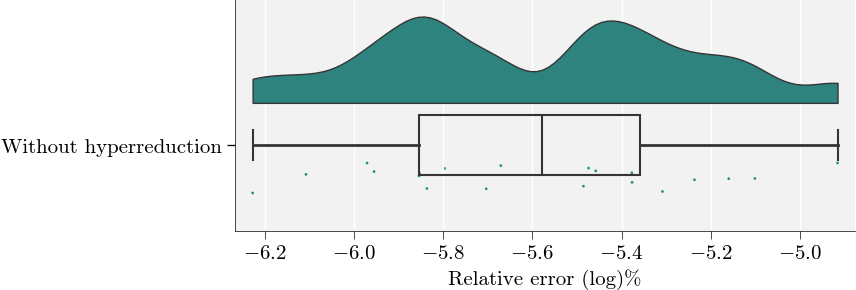

In [150]:
df_A = pd.DataFrame({'':'With hyperreduction','Relative error (log)%':np.log10(ROM_relative_error_h)})
df_B = pd.DataFrame({'':'Without hyperreduction','Relative error (log)%':np.log10(ROM_relative_error)})

# Combine the DataFrames
df = pd.concat([df_A, df_B])

fig, ax = plt.subplots(figsize=(8.3, 3))
pt.RainCloud(x = '', y = 'Relative error (log)%', data = df_A, palette = "Oranges", bw = 0.2,
    width_viol = 1., ax = ax, orient = "h",pointplot = False, dodge=False, alpha=1.0, width_box = 0.35, linewidth=1, point_size =2.0, move=0.2)
plt.show()

fig, ax = plt.subplots(figsize=(8, 3))
pt.RainCloud(x = '', y = 'Relative error (log)%', data = df_B, palette = "viridis", bw = 0.2,
    width_viol = 1., ax = ax, orient = "h",pointplot = False, dodge=False, alpha=1.0, width_box = 0.35, linewidth=1, point_size =2.0, move=0.2)
plt.show()

# ===

# df_C = pd.DataFrame({'':'With hyperreduction','Speed-up':ROM_speed_up_h})
# df_D = pd.DataFrame({'':'Without hyperreduction','Speed-up':ROM_speed_up})

# # Combine the DataFrames
# df2 = pd.concat([df_C, df_D])

# fig, ax = plt.subplots(figsize=(8.3, 2))
# pt.RainCloud(x = '', y = 'Speed-up', data = df_C, palette = "Oranges",
#     width_viol = 1.0, ax = ax, orient = "h",pointplot = False, dodge=True, alpha=1.0, width_box = 0.25, linewidth=1, point_size =2.0)

# fig, ax = plt.subplots(figsize=(8, 2))
# pt.RainCloud(x = '', y = 'Speed-up', data = df_D, palette = "viridis",
#     width_viol = 1.0, ax = ax, orient = "h",pointplot = False, dodge=True, alpha=0.95, width_box = 0.25, linewidth=1, point_size =2.0)
# plt.show()

---

# Uncertainty Qunatification [Propagation]

## Epistemic Uncertainty

##### Number of snapshot selected

In [151]:
Model_ROM_error[0],Model_error[0]

([0.13420975007935673,
  0.002847049668345522,
  0.01264189646607554,
  0.13226898780406834,
  0.0008647727276197518,
  0.04157326711877892,
  0.0021199175135630686,
  0.012146880874465587,
  0.12647420023395753,
  0.07537975638282358,
  0.011134620583685586,
  0.12455229519084633,
  0.07141409723086445,
  0.033463926378328804,
  0.014138224325874643,
  0.013570909533042515,
  0.022296243017627775,
  0.02955960887561586,
  0.11691791248397926,
  0.02140136006729707],
 [7.001750371174564,
  5.885856682935087,
  5.729492149097923,
  7.006522315329356,
  6.366936096248573,
  6.692380119511946,
  6.37173253827446,
  6.21679977323574,
  7.0208295166198535,
  6.861929071280296,
  6.541582968198848,
  7.0255957051885725,
  6.871486149785082,
  6.711533210880822,
  5.603187136897432,
  6.3956964792163955,
  6.077074558001969,
  6.721101784472436,
  7.044646055461379,
  5.928855483585682])

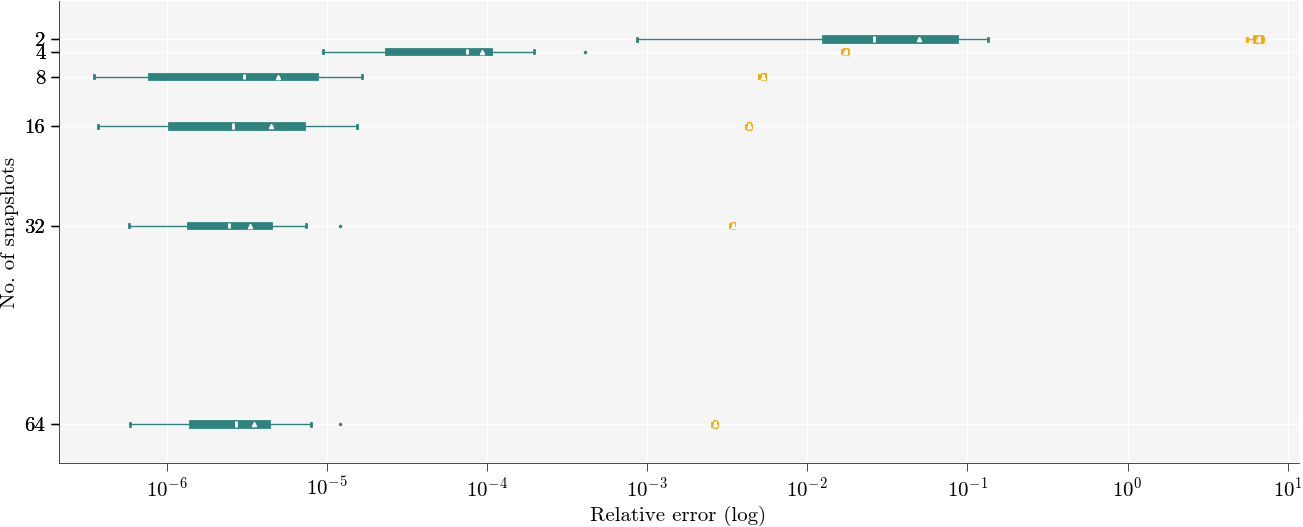

In [153]:
if N_snap==64:

    os.chdir(notebook_dir)
    Model_error.reverse()
    Model_ROM_error.reverse()

    np.save(f'data/{method}_sampling_ecsw.npy',Model_error)
    np.save(f'data/{method}_sampling.npy',Model_ROM_error)

    # tdata = np.load('data/ep_normal_sampling.npy')
    # tdata2 = np.load('Epistemic/normal_sampling_ecsw.npy')

    positions = np.array([2,4,8,16,32,64])
    # range(5,85,5)  # Positions for each box plot on the x-axis
    plt.rcParams['xtick.labelsize'] = 15 # For legend text
    plt.rcParams['ytick.labelsize'] = 15 # For legend text

    fig, ax_box = plt.subplots(figsize=(16, 6))
    from matplotlib.ticker import MaxNLocator

    ax_box.set_facecolor('#f5f5f5')
    # Create Box Plot with patch_artist=True

    boxprops = dict(linewidth=2.0, color='#2f837f', facecolor='#2f837f')
    meanprops = dict(marker='^', markeredgecolor='white', markersize = 3, markerfacecolor='white')

    box = ax_box.boxplot(Model_ROM_error, vert=False, patch_artist=True, widths=0.9,
                            boxprops=boxprops,
                            whiskerprops=dict(linewidth=1.0, color='#2f837f'),
                            capprops=dict(linewidth=2.0, color='#2f837f'),
                            medianprops=dict(linewidth=2.0, color='white'),
                            meanprops=meanprops,
                            positions=positions,
                            showmeans=True,
                            flierprops=dict(marker='.', markerfacecolor='#2f837f', markeredgecolor='#2f837f', markersize=3, linestyle='none'))


    boxprops = dict(linewidth=2.0, color='orange', facecolor='orange')
    meanprops = dict(marker='^', markeredgecolor='white', markersize = 3, markerfacecolor='white')

    box = ax_box.boxplot(Model_error, vert=False, patch_artist=True, widths=0.9,
                            boxprops=boxprops,
                            whiskerprops=dict(linewidth=1.0, color='orange'),
                            capprops=dict(linewidth=2.0, color='orange'),
                            medianprops=dict(linewidth=2.0, color='white'),
                            meanprops=meanprops,
                            positions=positions,
                            showmeans=True,
                            flierprops=dict(marker='.', markerfacecolor='#ffb300', markeredgecolor='#ffb300', markersize=3, linestyle='none'))


    # Remove unwanted spines and ticks from the boxplot
    # ax_box.set_yticks([2,4,8,16,32])
    plt.xscale('log')
    # plt.yscale('log')
    ax_box.spines['top'].set_visible(False)
    ax_box.spines['bottom'].set_visible(True)
    ax_box.spines['right'].set_visible(False)
    ax_box.spines['left'].set_visible(True)
    ax_box.set_xlabel('Relative error (log)')
    ax_box.set_ylabel('No. of snapshots')
    # plt.gca().yaxis.set_major_locator(MaxNLocator(5))
    # ax_box.set_yticklabels(['','','8','4','','2'])

    # Adjusting axis limits to increase the gap
    y_min, y_max = 2, 64
    y_range = y_max - y_min
    ax_box.set_ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)  # Adding 10% padding at both ends of the y-axis

    ax_box.invert_yaxis()
    # clr = '#5a2641'
    # ax_box.annotate('Snapshots: 2',xy=(0.009,31.5),xytext=(0.009,31.5),color=clr)
    # ax_box.annotate('4',xy=(0.03,31.5/2-0.2),xytext=(0.03,31.5/2-0.2),color=clr)
    # ax_box.annotate('8',xy=(0.03,31.5/4-0.5),xytext=(0.03,31.5/4-0.5),color=clr)
    # ax_box.annotate('16',xy=(0.03,31.5/8 -0.4),xytext=(0.03,31.5/8 -0.4),color=clr)
    # ax_box.annotate('32',xy=(0.03,31.5/16-0.5),xytext=(0.03,31.5/16-0.5),color=clr)

    plt.savefig(f'{method}_error_hist.png')
